<a href="https://colab.research.google.com/github/Ksrinivas286/ML-lab/blob/main/ML_Lab11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Expectation-Maximization (EM) Algorithm**

The Expectation-Maximization (EM) algorithm is an iterative optimization method that combines different unsupervised machine learning algorithms to find maximum likelihood or maximum posterior estimates of parameters in statistical models that involve unobserved latent variables. The EM algorithm is commonly used for latent variable models and can handle missing data. It consists of an estimation step (E-step) and a maximization step (M-step), forming an iterative process to improve model fit.

* In the E step, the algorithm computes the latent variables i.e. expectation of the log-likelihood using the current parameter estimates.

* In the M step, the algorithm determines the parameters that maximize the expected log-likelihood obtained in the E step, and corresponding model parameters are updated based on the estimated latent variables.


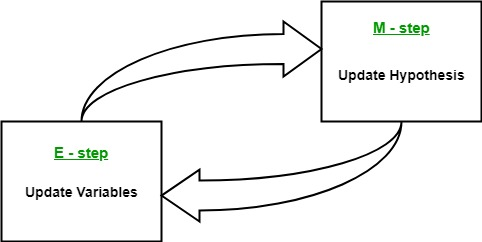

**Expectation-Maximization (EM)  Algorithm Working:**

The essence of the Expectation-Maximization algorithm is to use the available observed data of the dataset to estimate the missing data and then use that data to update the values of the parameters. Let us understand the EM algorithm in detail.

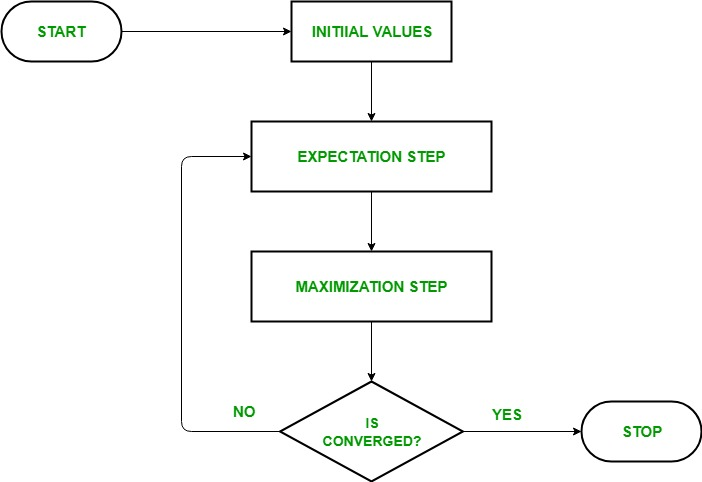

**K-Means Clustering Algorithm**
K-Means Clustering is an unsupervised learning algorithm that is used to solve the clustering problems in machine learning or data science. In this topic, we will learn what is K-means clustering algorithm, how the algorithm works, along with the Python implementation of k-means clustering.

**What is K-Means Algorithm?**

K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters. Here K defines the number of pre-defined clusters that need to be created in the process, as if K=2, there will be two clusters, and for K=3, there will be three clusters, and so on.

It is an iterative algorithm that divides the unlabeled dataset into k different clusters in such a way that each dataset belongs only one group that has similar properties.

It allows us to cluster the data into different groups and a convenient way to discover the categories of groups in the unlabeled dataset on its own without the need for any training.

It is a centroid-based algorithm, where each cluster is associated with a centroid. The main aim of this algorithm is to minimize the sum of distances between the data point and their corresponding clusters.



The algorithm takes the unlabeled dataset as input, divides the dataset into k-number of clusters, and repeats the process until it does not find the best clusters. The value of k should be predetermined in this algorithm.

**The k-means clustering algorithm mainly performs two tasks:**
* Determines the best value for K center points or centroids by an iterative process.
* Assigns each data point to its closest k-center. Those data points which are near to the particular k-center, create a cluster.


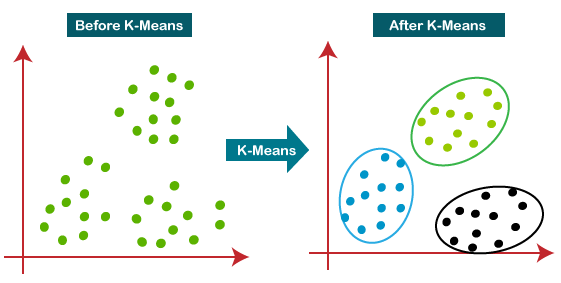

### **11. Apply EM algorithm to cluster a Heart Disease Data Set. Use the same data set for clustering using k-Means algorithm. Compare the results of these two algorithms and comment on the quality of clustering. You can add Java/Python ML library classes/API in the program.**

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset
License(s): unknown
  0% 0.00/6.18k [00:00<?, ?B/s]
100% 6.18k/6.18k [00:00<00:00, 11.7MB/s]
Archive:  heart-disease-dataset.zip
  inflating: heart.csv               
Silhouette Score for GMM: 0.1107
Silhouette Score for k-Means: 0.1687

Cluster counts for GMM:
Cluster 0: 497 points
Cluster 1: 528 points

Cluster counts for k-Means:
Cluster 0: 383 points
Cluster 1: 642 points

Cluster means for GMM:
Cluster 0 mean: [ 0.14893937  0.0799407  -0.91575542  0.03435952  0.07745143 -0.04622249
 -0.09262497 -0.39408698  0.49272082  0.31275188 -0.22982299  0.22104841
  0.210888  ]
Cluster 1 mean: [-0.14019482 -0.07524721  0.86198947 -0.0323422  -0.07290409  0.04350867
  0.08718676  0.37094929 -0.46379213 -0.29438955  0.21632959 -0.20807019
 -0.19850632]

Cluster means for k-Means:
Clust

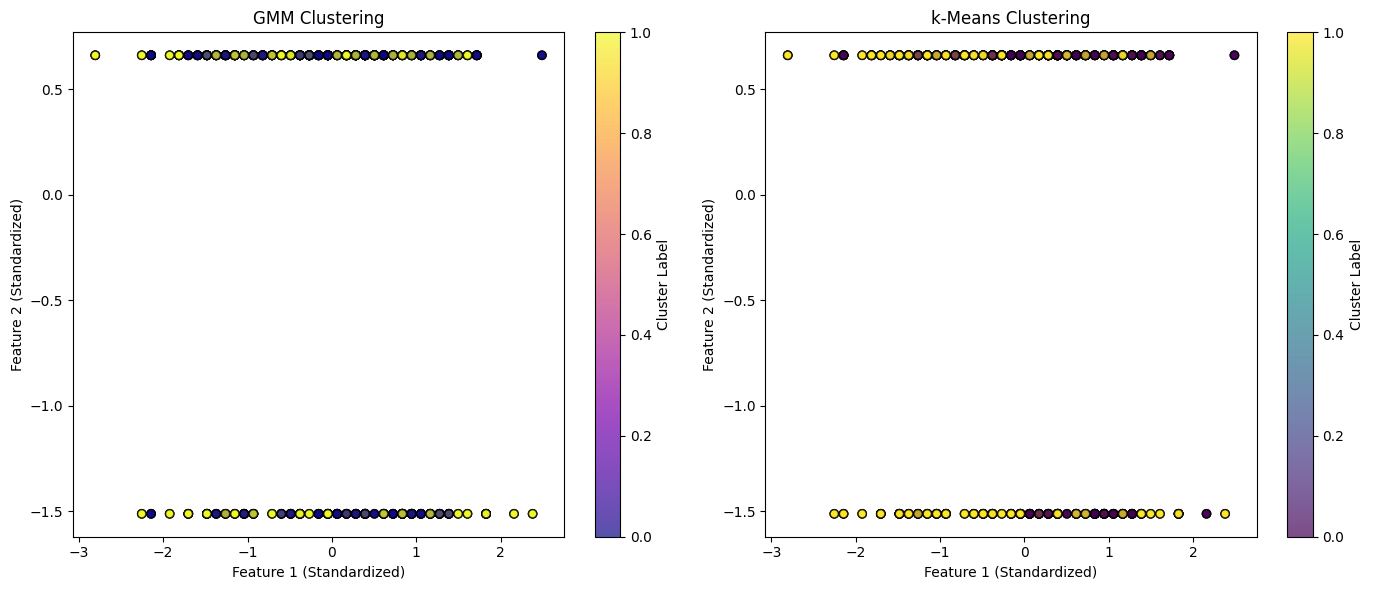

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load the heart disease dataset from a local file
file_path = '/content/heart_disease11.csv'  # Update this path if necessary
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d johnsmith88/heart-disease-dataset
!unzip heart-disease-dataset.zip

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load the heart disease dataset from a local file
# Modified to use downloaded file
file_path = '/content/heart.csv'  # Path to downloaded file
data = pd.read_csv(file_path, na_values='?')

# ... (rest of your code) ...

# Drop rows with missing values
data.dropna(inplace=True)

# Separate features and target variable
X = data.drop('target', axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

# Apply k-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Compare the results
def compare_clusters(data, gmm_labels, kmeans_labels):
    silhouette_gmm = silhouette_score(data, gmm_labels)
    silhouette_kmeans = silhouette_score(data, kmeans_labels)

    print(f'Silhouette Score for GMM: {silhouette_gmm:.4f}')
    print(f'Silhouette Score for k-Means: {silhouette_kmeans:.4f}')

    # Count number of points in each cluster for GMM
    gmm_counts = np.bincount(gmm_labels)
    kmeans_counts = np.bincount(kmeans_labels)

    print("\nCluster counts for GMM:")
    for i, count in enumerate(gmm_counts):
        print(f"Cluster {i}: {count} points")

    print("\nCluster counts for k-Means:")
    for i, count in enumerate(kmeans_counts):
        print(f"Cluster {i}: {count} points")

    # Calculate and print cluster means
    gmm_means = [data[gmm_labels == i].mean(axis=0) for i in range(2)]
    kmeans_means = [data[kmeans_labels == i].mean(axis=0) for i in range(2)]

    print("\nCluster means for GMM:")
    for i, mean in enumerate(gmm_means):
        print(f"Cluster {i} mean: {mean}")  # Directly printing the mean array

    print("\nCluster means for k-Means:")
    for i, mean in enumerate(kmeans_means):
        print(f"Cluster {i} mean: {mean}")  # Directly printing the mean array

    # Plot the clusters
    plt.figure(figsize=(14, 6))

    # Plot GMM Clustering
    plt.subplot(1, 2, 1)
    scatter_gmm = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=gmm_labels, cmap='plasma', marker='o', edgecolor='k', alpha=0.7)
    plt.title('GMM Clustering')
    plt.xlabel('Feature 1 (Standardized)')
    plt.ylabel('Feature 2 (Standardized)')
    plt.colorbar(scatter_gmm, label='Cluster Label')

    # Plot k-Means Clustering
    plt.subplot(1, 2, 2)
    scatter_kmeans = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis', marker='o', edgecolor='k', alpha=0.7)
    plt.title('k-Means Clustering')
    plt.xlabel('Feature 1 (Standardized)')
    plt.ylabel('Feature 2 (Standardized)')
    plt.colorbar(scatter_kmeans, label='Cluster Label')

    plt.tight_layout()
    plt.show()

# Call the comparison function
compare_clusters(X_scaled, gmm_labels, kmeans_labels)
